# Sales Insights.

## Introduction.

This project seeks to analyze the performance of an Indian company that sells electronic components throughout India. To carry out the analysis we have the sales from 2017 to 2020. The purpose of the analysis is for the head of the company to know how 2020 impacted the company's performance, which possible alerts he should take into account for 2021 and which initiatives it should focus on this year.

## Methodology.

This document is an adaptation of a sales analysis project i found in YouTube. Please click on [link](https://youtu.be/hhZ62IlTxYs) if you want to analyze it.

In the original project, the author was looking to create a Dashboard in Power BI, while I am using the information mainly to practice in Python.

Although initially, the idea was that both versions were going to have the same results, but I ended up digging a little more into the information, until I reached a set of recommendations that could be useful for the company.. I also made some changes in the monetary units because is easier for me to work with the dollar than the Hindu ruppi as a currency.

In the *SalesInsights.pbix* file yo can see my version of the power bi dashboard proposed by the author of the project. Unfortunately, I do not have a pro account so I cannot share the dashboard on internet.

To perform the information analysis, I performed the following steps:
+ <a href="#Importing-libraries-&-Information.">Importing libraries & Information.</a>
+ <a href="#Cleaning-&-merging-tables.">Cleaning & merging tables.</a>
+ <a href="#Transforming-the-data.">Transforming the data.</a>
+ <a href="#Checking-the-table-&-creating-its-summary-table.">Checking the table & creating its summary table</a>
+ <a href="#Preeliminar-analysis.">Preeliminar analysis.</a>
+ <a href="#Detailed-analysis.">Detailed analysis.</a>
+ <a href="#Last-conclusions.">Last conclusions.</a>

## Importing libraries & Information.

For this project, I will use the pandas, matplolib, and NumPy libraries. The information comes from a database that contains several tables, to be able to use them, I downloaded and use them as .csv files. I leave below a image of how the database looked in MySQL.

This is the transaction table.

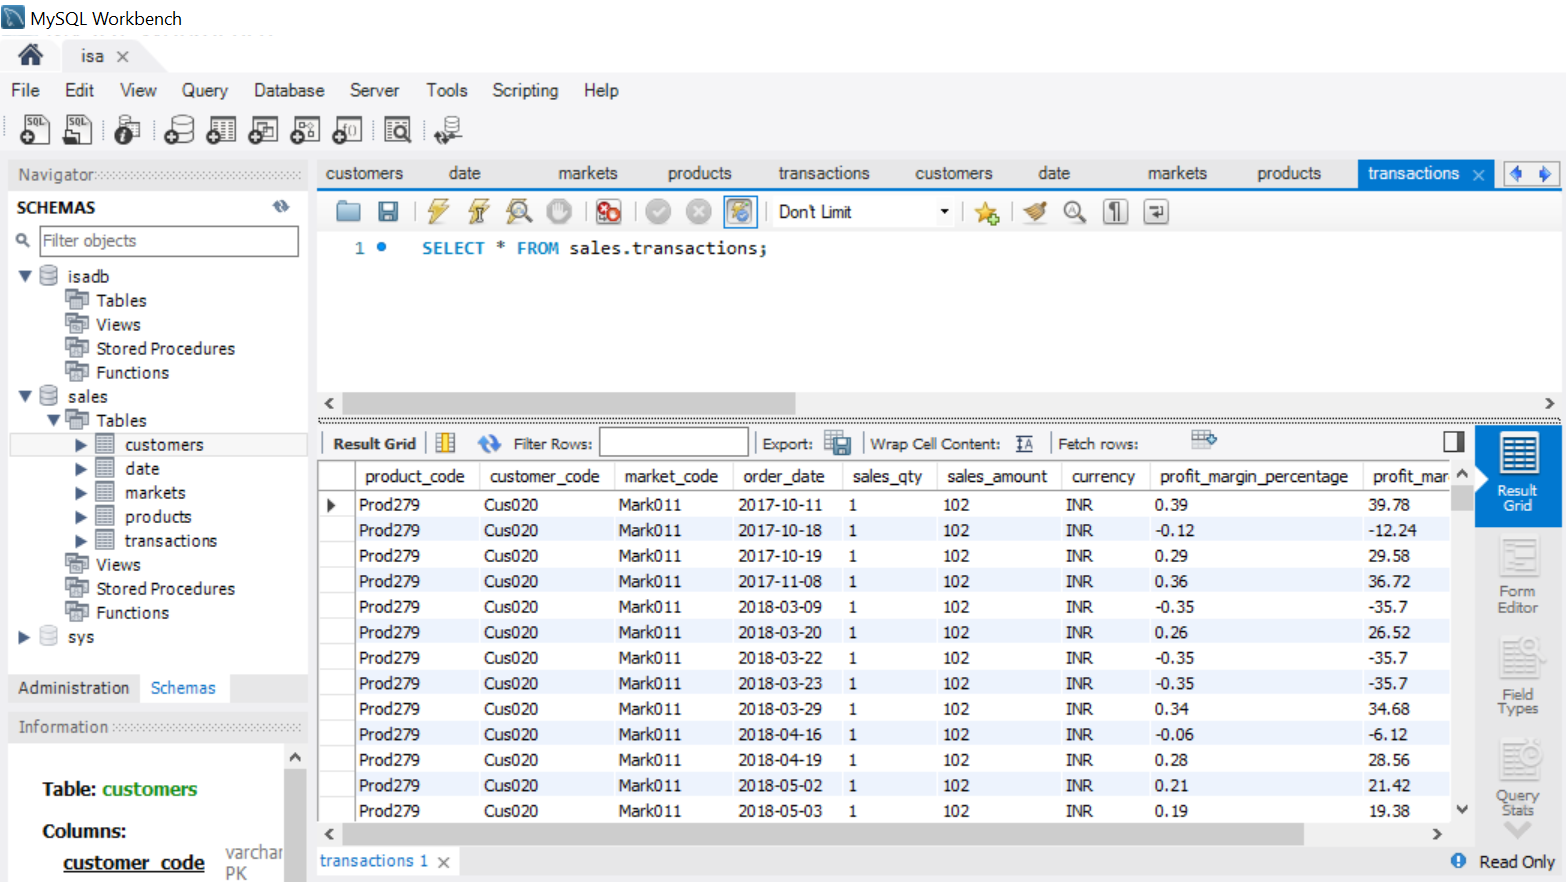

To avoid making the document unnecessarily long, i will only show this table, but the structure of the data can be seen below, when uncommenting the instructions that accompany the different tables. For the moment let's import the libraries, download and read the tables.

In [1]:
#Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the different csv & check the basic structure.
trans=pd.read_csv("transactions.csv")
#print("trans titles")
#print(trans.head(1))
#print(trans.info())
#print("-------")
cust=pd.read_csv("Customers.csv")
#print("cust titles")
#print(cust.head(1))
#print(cust.info())
#print("-------")
date=pd.read_csv("date.csv")
#print("date titles")
#print(date.head(1))
#print(date.info())
#print("-------")
mark=pd.read_csv("markets.csv")
#print("mark titles")
#print(mark.head(1))
#print(mark.info())
#print("-------")
prod=pd.read_csv("products.csv")
#print("prod titles")
#print(prod.head(1))
#print(prod.info())
#print("-------")

Once I have all the information in the notebook, let's start with the data mergin.

<a href="#Methodology.">Back to top.</a>

## Cleaning & merging tables.

The objective of this section is to join all the tables into one. To achieve this, I will need to modify the names of some column titles and also eliminate some columns to make the table as readable as possible.

In [3]:
#Fix a column name in cust.
cust["customer_name"]=cust["custmer_name"]
cust=cust.drop(["custmer_name"],axis=1)
print(cust.head())

  customer_code   customer_type   customer_name
0        Cus001  Brick & Mortar    Surge Stores
1        Cus002  Brick & Mortar    Nomad Stores
2        Cus003  Brick & Mortar    Excel Stores
3        Cus004  Brick & Mortar  Surface Stores
4        Cus005  Brick & Mortar  Premium Stores


In [4]:
# Merge trans with cust on column "customer_code".
trans1=trans.merge(cust, on="customer_code", how="inner")
#print(trans1)
print(trans1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148395 entries, 0 to 148394
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product_code              148395 non-null  object 
 1   customer_code             148395 non-null  object 
 2   market_code               148395 non-null  object 
 3   order_date                148395 non-null  object 
 4   sales_qty                 148395 non-null  int64  
 5   sales_amount              148395 non-null  int64  
 6   currency                  148395 non-null  object 
 7   profit_margin_percentage  148395 non-null  float64
 8   profit_margin             148395 non-null  float64
 9   cost_price                148395 non-null  float64
 10  customer_type             148395 non-null  object 
 11  customer_name             148395 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 14.7+ MB
None


In [5]:
# Add column "date" & eliminate column "order_date".
trans1["date"]=trans1["order_date"]
trans1=trans1.drop(["order_date"],axis=1)
#print(trans1.head())

In [6]:
# Merge trans1 with date on column "date".
trans2=trans1.merge(date, on="date", how="inner")
print(trans2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148395 entries, 0 to 148394
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product_code              148395 non-null  object 
 1   customer_code             148395 non-null  object 
 2   market_code               148395 non-null  object 
 3   sales_qty                 148395 non-null  int64  
 4   sales_amount              148395 non-null  int64  
 5   currency                  148395 non-null  object 
 6   profit_margin_percentage  148395 non-null  float64
 7   profit_margin             148395 non-null  float64
 8   cost_price                148395 non-null  float64
 9   customer_type             148395 non-null  object 
 10  customer_name             148395 non-null  object 
 11  date                      148395 non-null  object 
 12  cy_date                   148395 non-null  object 
 13  year                      148395 non-null  i

In [7]:
# Add column "market_code" & eliminate column "markets_code".
mark["market_code"]=mark["markets_code"]
mark=mark.drop(["markets_code"],axis=1)

In [8]:
# Merge trans2 with mark on column "market_code".
trans3=trans2.merge(mark, on="market_code", how="inner")
print(trans3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148395 entries, 0 to 148394
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product_code              148395 non-null  object 
 1   customer_code             148395 non-null  object 
 2   market_code               148395 non-null  object 
 3   sales_qty                 148395 non-null  int64  
 4   sales_amount              148395 non-null  int64  
 5   currency                  148395 non-null  object 
 6   profit_margin_percentage  148395 non-null  float64
 7   profit_margin             148395 non-null  float64
 8   cost_price                148395 non-null  float64
 9   customer_type             148395 non-null  object 
 10  customer_name             148395 non-null  object 
 11  date                      148395 non-null  object 
 12  cy_date                   148395 non-null  object 
 13  year                      148395 non-null  i

In [9]:
# Merge trans3 with prod on column "product_code".
trans4=trans3.merge(prod, on="product_code", how="inner")
print(trans4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93796 entries, 0 to 93795
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_code              93796 non-null  object 
 1   customer_code             93796 non-null  object 
 2   market_code               93796 non-null  object 
 3   sales_qty                 93796 non-null  int64  
 4   sales_amount              93796 non-null  int64  
 5   currency                  93796 non-null  object 
 6   profit_margin_percentage  93796 non-null  float64
 7   profit_margin             93796 non-null  float64
 8   cost_price                93796 non-null  float64
 9   customer_type             93796 non-null  object 
 10  customer_name             93796 non-null  object 
 11  date                      93796 non-null  object 
 12  cy_date                   93796 non-null  object 
 13  year                      93796 non-null  int64  
 14  month_

In [10]:
# Eliminate columns "cy_date" & "date_yy_mmm".
sales=trans4.drop(["cy_date","date_yy_mmm"],axis=1)
print(sales.head())

  product_code customer_code market_code  sales_qty  sales_amount currency  \
0      Prod279        Cus020     Mark011          1           102      INR   
1      Prod279        Cus020     Mark011          1           102      INR   
2      Prod279        Cus024     Mark011          1            93      INR   
3      Prod279        Cus022     Mark011          1           199      INR   
4      Prod279        Cus020     Mark011          1           102      INR   

   profit_margin_percentage  profit_margin  cost_price customer_type  \
0                      0.39          39.78       62.22    E-Commerce   
1                     -0.12         -12.24      114.24    E-Commerce   
2                      0.10           9.30       83.70    E-Commerce   
3                     -0.09         -17.91      216.91    E-Commerce   
4                      0.29          29.58       72.42    E-Commerce   

        customer_name        date  year month_name markets_name     zone  \
0               Nixon 

Next I document the order in which the old columns are left, since from now on the table will be treated as a numpy object

|Location|Column name|
|:---------:|:----------:|
|0|product_code 
|1|customer_code 
|2|market_code  
|3|sales_qty  
|4|sales_amount 
|5|currency 
|6|profit_margin_percentage  
|7|profit_margin  
|8|cost_price 
|9|customer_type
|10|customer_name        
|11|date  
|12|year 
|13|month_name     
|14|market_name
|15|zone 
|16|product_type

Once I have a unified table, I need to make some column modifications to help me better analyze the information. These modifications include unifying the sales units and creating the "Revenue" column.

<a href="#Methodology.">Back to top.</a>

## Transforming the data.

Now I will do the transformations.

In [11]:
#Change dataframe to numpy.
salesnp=sales.to_numpy()
#print(salesnp[:1,:])

In [12]:
# Create column "new_amount (USD)" in sales & make equal to "sales_amount".
sales["new_amount (USD)"] = sales["sales_amount"]
#Except when currency is equal to INR
mask = sales["currency"] == "INR"
# In this case must be divided by 75
sales.loc[mask,"new_amount (USD)"] = sales.loc[mask,"new_amount (USD)"]/75

# Create column "new_profit (USD)" in sales & make equal to "profit_margin".
sales["new_profit (USD)"] = sales["profit_margin"]
#Except when currency is equal to INR
mask = sales["currency"] == "INR"
# In this case must be divided by 75
sales.loc[mask,"new_profit (USD)"] = sales.loc[mask,"new_profit (USD)"]/75

# Change "Distribution\r" for "Distribution" & "Own Brand\r" for "Own Brand"
sales["product_type"].replace({"Distribution\r": "Distribution", "Own Brand\r": "Own Brand"}, inplace=True)

# Verify
#print(sales["sales_amount"][0])
#print(sales["sales_amount"][0]/75)
#print(sales["new_amount (USD)"][0])
print("---")
#print(sales["profit_margin"][0])
#print(sales["profit_margin"][0]/75)
#print(sales["new_profit (USD)"][0])
print(sales.head(1))

---
  product_code customer_code market_code  sales_qty  sales_amount currency  \
0      Prod279        Cus020     Mark011          1           102      INR   

   profit_margin_percentage  profit_margin  cost_price customer_type  \
0                      0.39          39.78       62.22    E-Commerce   

  customer_name        date  year month_name markets_name     zone  \
0         Nixon  2017-10-11  2017    October       Nagpur  Central   

   product_type  new_amount (USD)  new_profit (USD)  
0  Distribution              1.36            0.5304  


In [13]:
#Create column "revenues"
sales["revenues"]=sales["sales_qty"]*sales["new_amount (USD)"]

In [14]:
#Display number using floats
pd.options.display.float_format = '{:.2f}'.format
# Use "year" column with date format
sales["year"]=pd.to_datetime(sales["year"],format="%Y").dt.year

Now i am going to drop some columns that we wont use.

In [15]:
#Droping columns.
sales=sales.drop(["customer_code","market_code","date","markets_name","profit_margin_percentage"],axis=1)

Once I have finished with the transformations, the time has come to review the table.

<a href="#Methodology.">Back to top.</a>

## Checking the table & creating its summary table.

In this section, I will request the first 5 rows of the table are printed and that a summary table be created.

In [16]:
#Check the data.
sales1=sales.head()
print(sales1)
#sales1=sales.to_excel("sales2.xlsx")

  product_code  sales_qty  sales_amount currency  profit_margin  cost_price  \
0      Prod279          1           102      INR          39.78       62.22   
1      Prod279          1           102      INR         -12.24      114.24   
2      Prod279          1            93      INR           9.30       83.70   
3      Prod279          1           199      INR         -17.91      216.91   
4      Prod279          1           102      INR          29.58       72.42   

  customer_type       customer_name  year month_name     zone  product_type  \
0    E-Commerce               Nixon  2017    October  Central  Distribution   
1    E-Commerce               Nixon  2017    October  Central  Distribution   
2    E-Commerce               Power  2017    October  Central  Distribution   
3    E-Commerce  Electricalslytical  2017    October  Central  Distribution   
4    E-Commerce               Nixon  2017    October  Central  Distribution   

   new_amount (USD)  new_profit (USD)  revenues  


In [17]:
sales.describe()

,sales_qty,sales_amount,profit_margin,cost_price,year,new_amount (USD),new_profit (USD),revenues
count,93796.00,93796.00,93796.00,93796.00,93796.00,93796.00,93796.00,93796.00
mean,21.43,5499.73,134.32,5365.99,2018.55,73.34,1.95,19765.27
std,143.27,23530.88,4993.52,23509.76,0.86,313.75,77.34,691625.01
min,1.00,5.00,-369348.50,3.05,2017.00,0.07,-4924.65,0.07
25%,1.00,194.00,-75.78,186.42,2018.00,2.59,-1.01,2.65
50%,2.00,608.50,6.55,585.35,2019.00,8.15,0.09,13.33
75%,10.00,3130.00,119.34,3037.20,2019.00,41.73,1.59,423.02
max,14049.00,1510944.00,318752.64,1846742.50,2020.00,20145.92,11625.00,117760029.24


With this table, we can begin to see a trend in the data, as **all columns have large standard deviations**. This means that the information in the table is very dispersed. Let´s see the evolution of finances over the years.

<a href="#Methodology.">Back to top.</a>

## Preeliminar analysis.

To begin the analysis, I will create a dictionary that summarizes all commercial information and then,  make different plots to see how it evolves, finally will check if is possible to reach any preliminary conclusions.

In [18]:
# Define columns.
sales2017=sales[sales["year"]==2017]
sales2018=sales[sales["year"]==2018]
sales2019=sales[sales["year"]==2019]
sales2020=sales[sales["year"]==2020]
sales2017_c=sales2017[sales2017["zone"]=="Central"]
sales2017_n=sales2017[sales2017["zone"]=="North"]
sales2017_s=sales2017[sales2017["zone"]=="South"]
sales2018_c=sales2018[sales2018["zone"]=="Central"]
sales2018_n=sales2018[sales2018["zone"]=="North"]
sales2018_s=sales2018[sales2018["zone"]=="South"]
sales2019_c=sales2019[sales2019["zone"]=="Central"]
sales2019_n=sales2019[sales2019["zone"]=="North"]
sales2019_s=sales2019[sales2019["zone"]=="South"]
sales2020_c=sales2020[sales2020["zone"]=="Central"]
sales2020_n=sales2020[sales2020["zone"]=="North"]
sales2020_s=sales2020[sales2020["zone"]=="South"]

#Define dict.
resume={"Year":[2017,2018,2019,2020],
        "Sum quantity sales":[sales2017["sales_qty"].sum(),sales2018["sales_qty"].sum(),sales2019["sales_qty"].sum(),sales2020["sales_qty"].sum()],
        "Sum quantity sales central":[sales2017_c["sales_qty"].sum(),sales2018_c["sales_qty"].sum(),sales2019_c["sales_qty"].sum(),sales2020_c["sales_qty"].sum()],
        "Sum quantity sales north":[sales2017_n["sales_qty"].sum(),sales2018_n["sales_qty"].sum(),sales2019_n["sales_qty"].sum(),sales2020_n["sales_qty"].sum()],
        "Sum quantity sales south":[sales2017_s["sales_qty"].sum(),sales2018_s["sales_qty"].sum(),sales2019_s["sales_qty"].sum(),sales2020_s["sales_qty"].sum()],
        "Sum profit":[sales2017["new_profit (USD)"].sum(),sales2018["new_profit (USD)"].sum(),sales2019["new_profit (USD)"].sum(),sales2020["new_profit (USD)"].sum()],
        "Sum profit central":[sales2017_c["new_profit (USD)"].sum(),sales2018_c["new_profit (USD)"].sum(),sales2019_c["new_profit (USD)"].sum(),sales2020_c["new_profit (USD)"].sum()],
        "Sum profit north":[sales2017_n["new_profit (USD)"].sum(),sales2018_n["new_profit (USD)"].sum(),sales2019_n["new_profit (USD)"].sum(),sales2020_n["new_profit (USD)"].sum()],
        "Sum profit south":[sales2017_s["new_profit (USD)"].sum(),sales2018_s["new_profit (USD)"].sum(),sales2019_s["new_profit (USD)"].sum(),sales2020_s["new_profit (USD)"].sum()],
        "Sum Revenues":[((sales2017["revenues"].sum())/1000000),((sales2018["revenues"].sum())/1000000),((sales2019["revenues"].sum())/1000000),((sales2020["revenues"].sum())/1000000)],
        "Sum Revenues central":[((sales2017_c["revenues"].sum())/1000000),((sales2018_c["revenues"].sum())/1000000),((sales2019_c["revenues"].sum())/1000000),((sales2020_c["revenues"].sum())/1000000)],
        "Sum Revenues north":[((sales2017_n["revenues"].sum())/1000000),((sales2018_n["revenues"].sum())/1000000),((sales2019_n["revenues"].sum())/1000000),((sales2020_n["revenues"].sum())/1000000)],
        "Sum Revenues south":[((sales2017_s["revenues"].sum())/1000000),((sales2018_s["revenues"].sum())/1000000),((sales2019_s["revenues"].sum())/1000000),((sales2020_s["revenues"].sum())/1000000)],}
resume=pd.DataFrame.from_dict(resume)

#Print.
print(resume)

   Year  Sum quantity sales  Sum quantity sales central  \
0  2017              192730                       53685   
1  2018              819210                      258440   
2  2019              706455                      220920   
3  2020              291468                       80306   

   Sum quantity sales north  Sum quantity sales south  Sum profit  \
0                    103419                     35626    35033.75   
1                    419019                    141751    64113.97   
2                    341080                    144455    64669.83   
3                    155476                     55686    18785.63   

   Sum profit central  Sum profit north  Sum profit south  Sum Revenues  \
0             5415.60          28902.67            715.48        176.61   
1            34031.55          28547.69           1534.72        829.04   
2            30247.87          32046.36           2375.60        636.92   
3             5233.35           8636.90           4915.38 

The dictionary is called "resume" and firstly I will use it to see how many items were sold in the 3 regions.

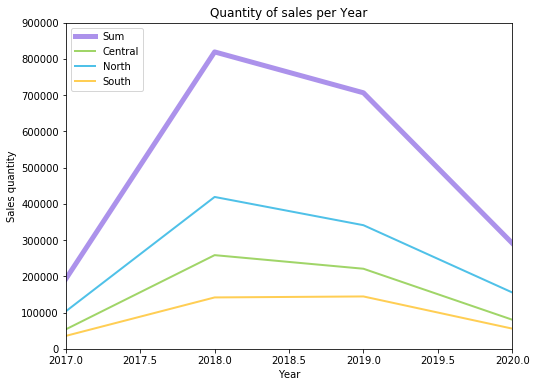

In [19]:
#Create the plot & its components.
fig = plt.figure(figsize=(8,6))
plt.plot(resume["Year"], resume["Sum quantity sales"], c='#ac92eb', label="Sum", linewidth=5)
plt.plot(resume["Year"], resume["Sum quantity sales central"], c='#a0d568', label="Central", linewidth=2)
plt.plot(resume["Year"], resume["Sum quantity sales north"], c='#4fc1e8', label="North", linewidth=2)
plt.plot(resume["Year"], resume["Sum quantity sales south"], c='#ffce54', label="South", linewidth=2)
# Create some format.
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Sales quantity")
plt.xlim(2017, 2020)
plt.ylim(0, 900000)
plt.title("Quantity of sales per Year")
#Show the plot.
plt.show()

We can see that 2018 was the year in which the greatest number of objects were sold, after this, the number of items sold decreased.

Now let´s see how these changes on the quantity of sales are translated into Revenues.

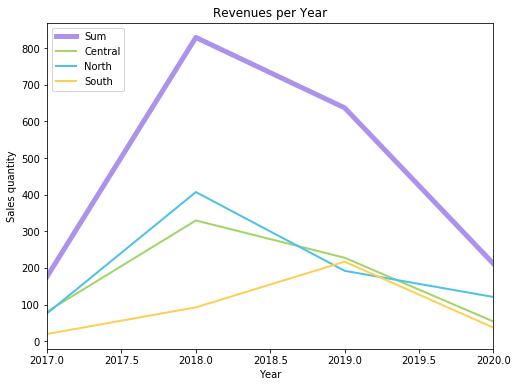

In [20]:
#Create the plot & its components.
fig = plt.figure(figsize=(8,6))
plt.plot(resume["Year"], resume["Sum Revenues"], c='#ac92eb', label="Sum", linewidth=5)
plt.plot(resume["Year"], resume["Sum Revenues central"], c='#a0d568', label="Central", linewidth=2)
plt.plot(resume["Year"], resume["Sum Revenues north"], c='#4fc1e8', label="North", linewidth=2)
plt.plot(resume["Year"], resume["Sum Revenues south"], c='#ffce54', label="South", linewidth=2)
# Format.
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Sales quantity")
plt.xlim(2017, 2020)
plt.title("Revenues per Year")
# Show the plot.
plt.show()

Although we keep seeing that the year of higher revenues is still 2018, in 2019 the 3 regions had similar levels. After that all have a decrease in their income levels, being the northern zone the one that suffers the least in 2020.

As a final preliminary step, let's see how these Revenues translates into the company's profit over the years.

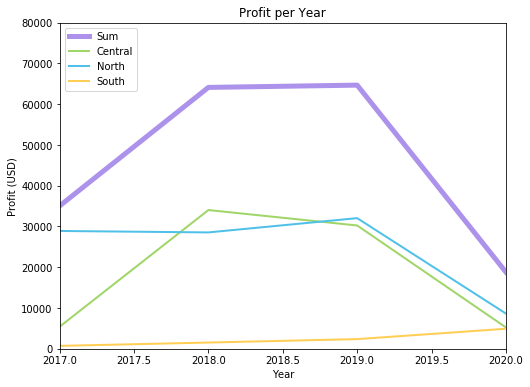

In [21]:
# Create the plot & its components.
fig = plt.figure(figsize=(8,6))
plt.plot(resume["Year"], resume["Sum profit"], c='#ac92eb', label="Sum", linewidth=5)
plt.plot(resume["Year"], resume["Sum profit central"], c='#a0d568', label="Central", linewidth=2)
plt.plot(resume["Year"], resume["Sum profit north"], c='#4fc1e8', label="North", linewidth=2)
plt.plot(resume["Year"], resume["Sum profit south"], c='#ffce54', label="South", linewidth=2)
# Format.
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Profit (USD)")
plt.xlim(2017, 2020)
plt.ylim(0, 80000)
plt.title("Profit per Year")
# Show the plot.
plt.show()

In the plot we can see that the northern and central regions have similar profit levels between 2018 & 2020, while the southern area remains relatively stable over the years with a slight trend towards growththrough the whole period, but nevertheless leaves very low profit levels.

<a href="#Methodology.">Back to top.</a>

## Detailed analysis.

Now that we have a general idea of the company's finances, let's take a closer look at how customers and products behave. Let's start by seeing the customer type.

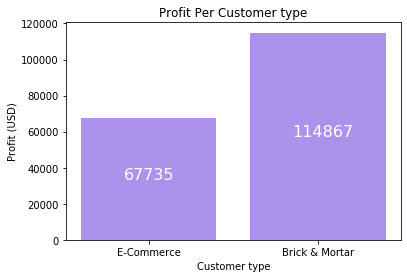

In [22]:
#Define the info.
sum_sales_e=sales[sales["customer_type"]=="E-Commerce"]
sum_sales_b=sales[sales["customer_type"]=="Brick & Mortar"]
sum_ecom=sum_sales_e["new_profit (USD)"].sum()
sum_brick=sum_sales_b["new_profit (USD)"].sum()
# Define & format the plot.
bar_positions = ['E-Commerce', 'Brick & Mortar']
bar_heights = [sum_ecom, sum_brick]
barElement=plt.bar(bar_positions, bar_heights,color="#ac92eb")
for element in barElement:
        plt.text(element.get_x()+.25,element.get_height()/2,int(element.get_height()),color="white",fontsize=16)
plt.title("Profit Per Customer type")
plt.ylabel("Profit (USD)")
plt.xlabel("Customer type")
#Show the plot.
plt.show()

We can see that "Brick & Mortar" almost doubles "E-commerce", however let's look in more detail to see if we can get a trend.

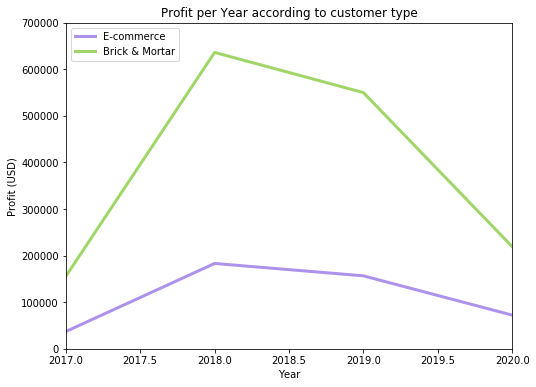

In [23]:
# Define the info.
sales2017_e=sales2017[sales2017["customer_type"]=="E-Commerce"]
sales2017_b=sales2017[sales2017["customer_type"]=="Brick & Mortar"]
sales2018_e=sales2018[sales2018["customer_type"]=="E-Commerce"]
sales2018_b=sales2018[sales2018["customer_type"]=="Brick & Mortar"]
sales2019_e=sales2019[sales2019["customer_type"]=="E-Commerce"]
sales2019_b=sales2019[sales2019["customer_type"]=="Brick & Mortar"]
sales2020_e=sales2020[sales2020["customer_type"]=="E-Commerce"]
sales2020_b=sales2020[sales2020["customer_type"]=="Brick & Mortar"]
#Define & format the plot.
resume={"Year":[2017,2018,2019,2020],
        "Sum_ecomm":[sales2017_e["sales_qty"].sum(),sales2018_e["sales_qty"].sum(),sales2019_e["sales_qty"].sum(),sales2020_e["sales_qty"].sum()],
        "Sum_brick":[sales2017_b["sales_qty"].sum(),sales2018_b["sales_qty"].sum(),sales2019_b["sales_qty"].sum(),sales2020_b["sales_qty"].sum()]}
fig = plt.figure(figsize=(8,6))
plt.plot(resume["Year"], resume["Sum_ecomm"], c='#ac92eb', label="E-commerce", linewidth=3)
plt.plot(resume["Year"], resume["Sum_brick"], c='#a0d568', label="Brick & Mortar", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Profit (USD)")
plt.xlim(2017, 2020)
plt.ylim(0, 700000)
plt.title("Profit per Year according to customer type")
# Show the plot
plt.show()

As we can see, **E-commerce** channel has a **fairly stable trend over the years**. Although in 2020 there was a decrease in profits, this customer type had a much smaller decrease than Brick & Mortar. This may be a first clue as to where efforts should go in 2021. Let´s make a last zoom on our customers to see if we can find which generate profits and losses.

In [24]:
# Define the basic table.
customers=sales[['new_profit (USD)',"customer_name","zone"]]
cust_des=customers.sort_values(by=["new_profit (USD)"],ascending=False)

# Define the tables with the important information.
cust_pos=cust_des[cust_des["new_profit (USD)"]>0]
cust_zer=cust_des[cust_des["new_profit (USD)"]==0]
cust_neg=cust_des[cust_des["new_profit (USD)"]<0]

# Print the tables.
print("POSITIVE PROFIT")
print(cust_pos)
print(cust_pos.count())
print((cust_pos.count()/customers[["new_profit (USD)"]].count())*100)
print("------------")
print("AMOUNT OF CUSTOMERS WITH POSITIVE PROFITS")
print(cust_pos["customer_name"].count())
print("------------")
print("% OF CUSTOMERS WITH POSITIVE PROFITS ")
print((cust_pos["new_profit (USD)"].count()/customers["new_profit (USD)"].count())*100)
print("------------")
print("------------")
print("PROFIT EQUAL TO ZERO")
print(cust_zer)
print(cust_zer.count())
print((cust_zer.count()/customers[["new_profit (USD)"]].count())*100)
print("------------")
print("AMOUNT OF CUSTOMERS WITH ZERO PROFITS")
print(cust_zer["customer_name"].count())
print("------------")
print("% OF CUSTOMERS WITH ZERO PROFITS ")
print((cust_zer["new_profit (USD)"].count()/customers["new_profit (USD)"].count())*100)
print("------------")
print("------------")
print("NEGATIVE PROFIT")
print(cust_neg)
print("------------")
print("AMOUNT OF CUSTOMERS WITH NEGATIVE PROFITS")
print(cust_neg["customer_name"].count())
print("------------")
print("% OF CUSTOMERS WITH NEGATIVE PROFITS ")
print((cust_neg["new_profit (USD)"].count()/customers["new_profit (USD)"].count())*100)

POSITIVE PROFIT
       new_profit (USD)             customer_name     zone
78286          11625.00            Premium Stores    North
80828           4250.04        Electricalslytical  Central
71532           3982.68                     Nixon    North
78288           3187.50            Premium Stores    North
80799           2999.56        Electricalslytical  Central
...                 ...                       ...      ...
64847              0.01            Premium Stores    North
14499              0.00  Electricalsopedia Stores  Central
76657              0.00            Premium Stores    North
86781              0.00                    Propel  Central
73189              0.00          Acclaimed Stores    North

[49260 rows x 3 columns]
new_profit (USD)    49260
customer_name       49260
zone                49260
dtype: int64
customer_name        nan
new_profit (USD)   52.52
zone                 nan
dtype: float64
------------
AMOUNT OF CUSTOMERS WITH POSITIVE PROFITS
49260
--------

As we can see **52.52% of the clients generate profits, 1.38% generate zero profits and 46.10% generate losses**. This behavior is consistent with the high data dispersion that we had seen previously. Let´s keep looking for more information about customers behaviors to generate an effective sales strategies.

Let's see now how profits behave when comparing the type of products we sell.

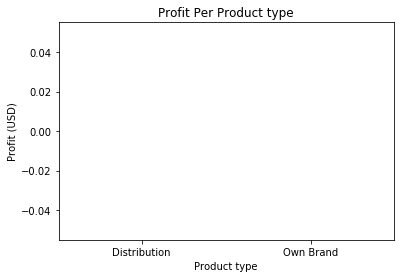

In [25]:
#Define the info.
sum_sales_d=sales[sales["product_type"]=="Distribution\r"]
sum_sales_o=sales[sales["product_type"]=="Own Brand\r"]
sum_dist=sum_sales_d["new_profit (USD)"].sum()
sum_own=sum_sales_o["new_profit (USD)"].sum()

# Define & format the plot.
bar_positions = ['Distribution', 'Own Brand']
bar_heights = [sum_dist, sum_own]
barElement=plt.bar(bar_positions, bar_heights,color="#ac92eb")
for element in barElement:
    plt.text(element.get_x()+.25,element.get_height()/2,int(element.get_height()),color="white",fontsize=16)
plt.title("Profit Per Product type")
plt.ylabel("Profit (USD)")
plt.xlabel("Product type")

# Show the plot
plt.show()

In the plot we can see that our brand is selling much better than the Distribution products, however let's look in more detail to learn more.

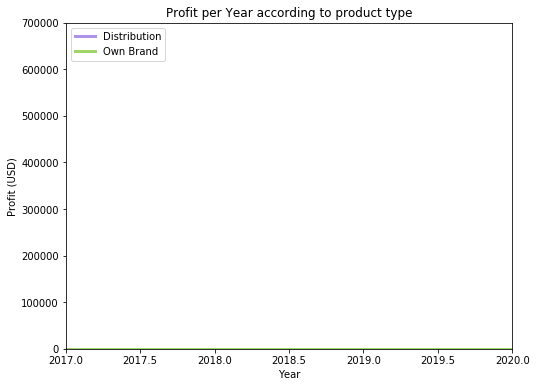

In [26]:
#Define the info.
sales2017_d=sales2017[sales2017["product_type"]=='Distribution\r']
sales2017_o=sales2017[sales2017["product_type"]=="Own Brand\r"]
sales2018_d=sales2018[sales2018["product_type"]=='Distribution\r']
sales2018_o=sales2018[sales2018["product_type"]=="Own Brand\r"]
sales2019_d=sales2019[sales2019["product_type"]=='Distribution\r']
sales2019_o=sales2019[sales2019["product_type"]=="Own Brand\r"]
sales2020_d=sales2020[sales2020["product_type"]=='Distribution\r']
sales2020_o=sales2020[sales2020["product_type"]=="Own Brand\r"]

resume={"Year":[2017,2018,2019,2020],
        "Sum_dist":[sales2017_d["sales_qty"].sum(),sales2018_d["sales_qty"].sum(),sales2019_d["sales_qty"].sum(),sales2020_d["sales_qty"].sum()],
        "Sum_own":[sales2017_o["sales_qty"].sum(),sales2018_o["sales_qty"].sum(),sales2019_o["sales_qty"].sum(),sales2020_o["sales_qty"].sum()]}

# Define & format the plot.        
fig = plt.figure(figsize=(8,6))
plt.plot(resume["Year"], resume["Sum_dist"], c='#ac92eb', label="Distribution", linewidth=3)
plt.plot(resume["Year"], resume["Sum_own"], c='#a0d568', label="Own Brand", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Profit (USD)")
plt.xlim(2017, 2020)
plt.ylim(0, 700000)
plt.title("Profit per Year according to product type")

# Show the plot.
plt.show()

As we can see in the graph, much of the **drop in profits is due to the products of our own brand**, this gives us a second clue about the strategy we should take. Let´s see if is possible to know which products are generating a decrease in profits.

In [27]:
# Define the basic table.
products=sales.pivot_table(values='new_profit (USD)', index= "product_code", aggfunc=np.sum)
# Define the tables with the important information.
prod_asc=products.sort_values(by=["new_profit (USD)"],ascending=False)
prod_des=products.sort_values(by=["new_profit (USD)"],ascending=True)
# Print the tables.
print("PRODUCTS THAT GENERATE PROFITS")
print(prod_asc[prod_asc["new_profit (USD)"]>=0])
print("---------")
print("AMOUNT OF PRODUCTS THAT GENERATE PROFITS")
print(prod_asc[prod_asc["new_profit (USD)"]>=0].count())
print("---------")
print("---------")
print("PRODUCTS THAT GENERATE LOSSES")
print(prod_des[prod_des["new_profit (USD)"]<0])
print("---------")
print("AMOUNT OF PRODUCTS THAT GENERATE LOSSES")
print(prod_asc[prod_asc["new_profit (USD)"]<0].count())

PRODUCTS THAT GENERATE PROFITS
              new_profit (USD)
product_code                  
Prod003               14621.95
Prod040               13676.49
Prod090                9393.98
Prod049                9262.83
Prod077                8028.59
...                        ...
Prod247                   0.40
Prod154                   0.39
Prod111                   0.32
Prod115                   0.30
Prod032                   0.06

[184 rows x 1 columns]
---------
AMOUNT OF PRODUCTS THAT GENERATE PROFITS
new_profit (USD)    184
dtype: int64
---------
---------
PRODUCTS THAT GENERATE LOSSES
              new_profit (USD)
product_code                  
Prod073               -4924.65
Prod044               -3571.33
Prod084               -2532.01
Prod169               -2030.49
Prod016               -1936.25
...                        ...
Prod256                  -0.88
Prod085                  -0.44
Prod222                  -0.16
Prod181                  -0.07
Prod175                  -0.05



We have discovered an important fact, **a third of the products we are selling are generating losses**. From the information we have so far we can draw some conclusions about the company:
+ It is a company that worked to imporove its profit, and it worked during the years 2018 and 2019, but this strategy did not work for the changes that 2020 entailed.
+ Most of its sales are generated by the "Mortar & Brick" client type.
+ Most of its clients are in the north and south zones.
+ Historically, most of its profit are associated with the sale of its own products.
+ The data that relates profits to customers and products is highly dispersed. This could be a sign that the company is not in control over which customers and products are profitable, generating that approximately a third of the products sales are associated with losses.


To understand how we can face 2021, we must start by remembering that 2020 was a very particular year and the most likely thing is that 2021 will have a behavior that will be highly influenced by the events of the previous year, due to this, we propose a strategy that focuses on understanding how we did last year, so we can learn from it and create a better strategy.

## Analyzing 2020.

Let's start by filtering the "sales" dataframe, so that we focus only on 2020 data.

In [28]:
sales2020=sales[sales["year"]==2020]
sales2020

,product_code,sales_qty,sales_amount,currency,profit_margin,cost_price,customer_type,customer_name,year,month_name,zone,product_type,new_amount (USD),new_profit (USD),revenues
144,Prod279,1,102,INR,14.28,87.72,E-Commerce,Nixon,2020,January,Central,Distribution,1.36,0.19,1.36
145,Prod279,1,102,INR,34.68,67.32,E-Commerce,Nixon,2020,January,Central,Distribution,1.36,0.46,1.36
146,Prod279,1,194,INR,7.76,186.24,E-Commerce,Electricalslytical,2020,January,Central,Distribution,2.59,0.10,2.59
147,Prod279,1,102,INR,-16.32,118.32,E-Commerce,Nixon,2020,January,Central,Distribution,1.36,-0.22,1.36
148,Prod279,1,574,INR,-195.16,769.16,E-Commerce,Modular,2020,January,Central,Distribution,7.65,-2.60,7.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93679,Prod272,8,3398,INR,645.62,2752.38,Brick & Mortar,Surface Stores,2020,June,South,Own Brand,45.31,8.61,362.45
93700,Prod272,7,2977,INR,1161.03,1815.97,Brick & Mortar,Surface Stores,2020,April,South,Own Brand,39.69,15.48,277.85
93740,Prod235,16,3218,INR,225.26,2992.74,Brick & Mortar,Surge Stores,2020,June,South,Distribution,42.91,3.00,686.51
93791,Prod085,6000,29167,INR,-3500.04,32667.04,E-Commerce,Insight,2020,April,North,Own Brand,388.89,-46.67,2333360.00


Now let's look at a simple statistical description of the new information.

In [29]:
sales2020.describe()

,sales_qty,sales_amount,profit_margin,cost_price,year,new_amount (USD),new_profit (USD),revenues
count,13660.00,13660.00,13660.00,13660.00,13660.00,13660.00,13660.00,13660.00
mean,21.34,5665.79,103.14,5562.65,2020.00,75.54,1.38,15470.92
std,128.94,25994.17,5499.40,27575.03,0.00,346.59,73.33,272811.98
min,1.00,5.00,-369348.50,3.05,2020.00,0.07,-4924.65,0.07
25%,1.00,208.00,-78.75,193.58,2020.00,2.77,-1.05,2.84
50%,2.00,681.00,7.55,648.86,2020.00,9.08,0.10,15.28
75%,11.00,3352.00,134.81,3241.30,2020.00,44.69,1.80,485.14
max,8000.00,1477394.00,157564.68,1846742.50,2020.00,19698.59,2100.86,18654561.57


When analyzing the table we see again how the standard deviation is very high. However, we also see the mean is very close to the group with the best performance (75%), this can give us signs that there is an important difference between the sales that generate more profit and those that generate losses. Let's see how much profit we had on the 2020 period.

In [30]:
print("PROFITS IN 2020.")
print(sales2020["new_profit (USD)"].sum())

PROFITS IN 2020.
18785.633466666666


The total profit for the period was **18785.63 USD**.

## 2020 products analysis.

Let's see the behavior of the products sold.

In [34]:
#Define the table.
salespos=sales2020[sales2020["new_profit (USD)"]>=0]
salespos=salespos["product_code"].unique()
sales20prod=sales2020.groupby("product_code").sum()
sales20prod=sales20prod.sort_values(by=["new_profit (USD)"], ascending=False)
prod_pos=sales20prod[sales20prod["new_profit (USD)"]>=0]
prod_neg=sales20prod[sales20prod["new_profit (USD)"]<0]

#Printing the table.
print("AMOUNT OF PRODUCTS SOLD IN 2020")
print(len(sales2020["product_code"].unique()))
#print("PRODUCTS SOLD DURING 2020 THAT GENERATED PROFIT")
#print(salespos)
print("-------")
print("AMOUNT OF PRODUCTS THAT GENERATE PROFITS")
print(len(prod_pos["new_profit (USD)"]))
print("-------")
print("PROFIT GENERATED BY ALL PROFITABLE PRODUCTS")
print(prod_pos["new_profit (USD)"].sum())
print("-------")
print("% OF PRODUCTS THAT GENERATE PROFIT")
print(len(prod_pos)/len(sales20prod)*100)
print("--------")
print("PROFIT GENERATED BY THE 5 MOST PROFITABLE PRODUCTS")
print(sales20prod["new_profit (USD)"].head().sum())
print("-------")
print("PROFIT % GENERATED BY THE 5 MOST PROFITABLE PRODUCTS")
print(((sales20prod["new_profit (USD)"].head().sum())/sales20prod["new_profit (USD)"].sum())*100)
print("-------")
print("AMOUNT OF PRODUCTS THAT GENERATE LOSSES")
print(len(prod_neg["new_profit (USD)"]))
print("-------")
print("LOSSES FROM PRODUCTS SOLD IN 2020")
print(prod_neg["new_profit (USD)"].sum())
print("----------")
print("% OF PRODUCTS THAT GENERATE LOSSES")
print(len(prod_neg)/len(sales20prod)*100)
print("-----------")
print("LOSSES GENERATED BY THE 5 LESS PROFITABLE PRODUCTS")
print(sales20prod["new_profit (USD)"].tail().sum())
print("-------")
print("LOSSES % GENERATED BY THE 5 LESS PROFITABLE PRODUCTS")
print(((sales20prod["new_profit (USD)"].tail().sum())/sales20prod["new_profit (USD)"].sum())*100)


AMOUNT OF PRODUCTS SOLD IN 2020
146
-------
AMOUNT OF PRODUCTS THAT GENERATE PROFITS
93
-------
PROFIT GENERATED BY ALL PROFITABLE PRODUCTS
34549.18933333333
-------
% OF PRODUCTS THAT GENERATE PROFIT
63.6986301369863
--------
PROFIT GENERATED BY THE 5 MOST PROFITABLE PRODUCTS
10959.174666666666
-------
PROFIT % GENERATED BY THE 5 MOST PROFITABLE PRODUCTS
58.33806289318212
-------
AMOUNT OF PRODUCTS THAT GENERATE LOSSES
53
-------
LOSSES FROM PRODUCTS SOLD IN 2020
-15763.55586666667
----------
% OF PRODUCTS THAT GENERATE LOSSES
36.3013698630137
-----------
LOSSES GENERATED BY THE 5 LESS PROFITABLE PRODUCTS
-9465.703066666667
-------
LOSSES % GENERATED BY THE 5 LESS PROFITABLE PRODUCTS
-50.387989755376985


From all this information we can draw some conclusions:
+ 146 products were sold in 2020.
+ **63.70% of the products generate profits** and that these profits almost double the profits obtained in the period.
+ **53 products generate a loss of more than 15 thousand dollars**, that is, they almost reach the level of profit reached in 2020.
+  **5 of them generated more than half of the profits (58.33%)**. On the contrary, **the last 5 products generated a loss equivalent to 50% of the profits**.

So we can say that although, there is a great dispersion in the data, it is possible to discover which products have a great impact on profits and losses. Now let's dig a little more into to see if we get a better understanding of the product's behavior.

## Analysis of product profit per month.

Let's see how the products that generated profit behaved throughout the 2020 period, and how we compare them with the total of products sold.

In [ ]:
#Define the table.
prod_month=sales2020[["new_profit (USD)","month_name"]]
prod_month=prod_month.groupby("month_name").sum()
prod_month=prod_month.sort_values(by=["new_profit (USD)"], ascending=False)

prod_p=sales2020[sales2020["new_profit (USD)"]>=0]
prod_month_p=prod_p[["new_profit (USD)","month_name"]]
prod_month_p=prod_month_p.groupby("month_name").sum()
prod_month_p=prod_month_p.sort_values(by=["new_profit (USD)"], ascending=False)

prod_n=sales2020[sales2020["new_profit (USD)"]<0]
prod_month_n=prod_n[["new_profit (USD)","month_name"]]
prod_month_n=prod_month_n.groupby("month_name").sum()
prod_month_n=prod_month_n.sort_values(by=["new_profit (USD)"], ascending=False)

month=prod_month.merge(prod_month_p, on="month_name", how="inner")
month["Total Profit (USD)"]=month["new_profit (USD)_x"]
month=month.drop(["new_profit (USD)_x"],axis=1)
month["Positive Profit (USD)"]=month["new_profit (USD)_y"]
month=month.drop(["new_profit (USD)_y"],axis=1)
month_t=month.merge(prod_month_n, on="month_name", how="inner")
month_t["Negative Profit (USD)"]=month_t["new_profit (USD)"]
month_t=month_t.drop(["new_profit (USD)"],axis=1)
month_t=month_t.reset_index()
month_t["Month number"]=[3,2,5,1,6,4]
month_t=month_t.sort_values(by=["Month number"], ascending=True)

#Printing the table.
month_t
#type(month_t)

It will be easier to understand the behavior if we look at a plot.

In [ ]:
#Create the plot & its components.
fig = plt.figure()
plt.plot(month_t["Month number"], month_t["Total Profit (USD)"], c='#ac92eb', label="Total", linewidth=5)
plt.plot(month_t["Month number"], month_t["Positive Profit (USD)"], c='#a0d568', label="Positive", linewidth=2)
plt.plot(month_t["Month number"], month_t["Negative Profit (USD)"], c='#4fc1e8', label="Negative", linewidth=2)

# Create some format.
plt.legend(loc="lower right")
plt.xlabel("Month number")
plt.ylabel("Sales quantity")
plt.title("Quantity of sales per month")
#Show the plot.
plt.show()

During the first quarter of the year, sales that generated losses remained low and stable, however, they started to rise once the world began to change due to the pandemic.It would be interesting to know how it behaved as the pandemic became an increasingly important part of our lives.

## Analysis by type of product sold.

Now let's see how they behaved according to their type.

In [ ]:
# Defining the table of total profit.
cust_t=sales2020[["new_profit (USD)","product_type"]]
cust_total=cust_t.groupby("product_type").sum()
cust_total=cust_total.sort_values(by=["new_profit (USD)"], ascending=False)
#print(cust_total)
#print(sales2020[["new_profit (USD)"]].sum())

#Defining the table of positive profit.
prod_p=sales2020[sales2020["new_profit (USD)"]>=0]
cust_pos=prod_p[["new_profit (USD)","product_type"]]
cust_pos=cust_pos.groupby("product_type").sum()
cust_pos=cust_pos.sort_values(by=["new_profit (USD)"], ascending=False)
#print(cust_pos.head())
#print(prod_p[["new_profit (USD)"]].sum())

#Defining the table of losses
from pandas import DataFrame
prod_n=sales2020[sales2020["new_profit (USD)"]<0]
cust_neg=prod_n[["new_profit (USD)","product_type"]]
cust_neg=cust_neg.groupby("product_type").sum()
cust_neg=cust_neg.sort_values(by=["new_profit (USD)"], ascending=True)
cust_neg["abs new_profit(USD)"]=[abs(cust_neg.iloc[0,0]),abs(cust_neg.iloc[1,0])]
cust_neg_b=[cust_neg.iloc[0,0],cust_neg.iloc[1,0]]
cust_neg_df=pd.DataFrame(cust_neg_b)
cust_neg=cust_neg.drop(["new_profit (USD)"],axis=1)
cust_neg
#print(cust_neg)
#print(prod_n[["new_profit (USD)"]].sum())

#Merging the tables.
c_type=cust_total.merge(cust_pos, on="product_type", how="inner")
c_type["Total  profit (USD)"]=c_type["new_profit (USD)_x"]
c_type=c_type.drop(["new_profit (USD)_x"],axis=1)
c_type["Positive Profit (USD)"]=c_type["new_profit (USD)_y"]
c_type=c_type.drop(["new_profit (USD)_y"],axis=1)
c_type=c_type.merge(cust_neg, on="product_type", how="inner")
c_type["Negative Profit (USD)"]=c_type["abs new_profit(USD)"]
c_type=c_type.drop(["abs new_profit(USD)"],axis=1)
c_type=c_type.reset_index()

c_type

We can see that the trend of profits by product type repeats in 2020, that is to say, the profits from our own products are greater than from distribution products.I'm going to turn the data into percentages to see if we can find something else about the distribution.

In [ ]:
c_type_perc={"product_type":["Own Brand","Distribution"],
             "% Total profit":[(cust_total.iloc[0,0])/float(cust_total.sum(axis=0))*100,(cust_total.iloc[1,0])/float(cust_total.sum(axis=0))*100],
             "% positive profit":[(cust_pos.iloc[0,0])/float(cust_pos.sum(axis=0))*100,(cust_pos.iloc[1,0])/float(cust_pos.sum(axis=0))*100],
             "% negative profit":[(cust_neg_df.iloc[0,0])/float(cust_neg_df.sum())*100,(cust_neg_df.iloc[1,0])/float(cust_neg_df.sum())*100]}
c_type_df = pd.DataFrame(c_type_perc)
c_type_df
#print((cust_neg_df.iloc[0,0]))
#print(float(cust_neg_df.sum()))

Now let's see if we can conclude something from the plots.

In [ ]:
# Pie charts
labels = c_type_perc['product_type']
sizes = c_type_perc['% Total profit']
sizesp= c_type_perc['% positive profit']
sizesn=c_type_perc["% negative profit"]
explode = (0, 0.1)

#add colors
colors = ["#ac92eb","#a0d568"]
fig1, ax1 = plt.subplots()
fig1,ax2= plt.subplots()
fig1,ax3= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.pie(sizesp, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.pie(sizesn, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set_title('% Customer type in total profit')
ax2.axis("equal")
ax2.set_title('% Customer type in positive profit')
ax3.axis("equal")
ax3.set_title('% Customer type in negative profit')

plt.show()

In [ ]:
summary={"Positive":prod_p[["new_profit (USD)"]].sum(),"Negative":prod_n[["new_profit (USD)"]].sum(),"Total":sales2020[["new_profit (USD)"]].sum()}
summary=pd.DataFrame(summary)
summary

In [ ]:
objects = ('Positive', 'Negative', 'Total')
y_pos = np.arange(len(objects))
performance = [prod_p[["new_profit (USD)"]].sum(),prod_n[["new_profit (USD)"]].sum(),18785.63]
barElement=plt.bar(y_pos, performance, align='center', alpha=0.5,color="#ac92eb")
for element in barElement:
    plt.text(element.get_x()+.15,element.get_height()/3,int(element.get_height()),color="white",fontsize=14)
plt.xticks(y_pos, objects)
plt.ylabel('Profit')
plt.title('Summary of Profit according to customer type')

plt.show()

I don't see anything in particular when analyzing the type of product, so I think the best conclusion that can be reached is that 2020 maintains the trend of previous years.Once we have analyzed the products, lets analyze the customers.

## 2020 Customer analysis.

Let's see how customers behave.

In [40]:
# Define the table.
sales20cust=sales2020.groupby("customer_name").sum()
sales20cust=sales20cust.sort_values(by=["new_profit (USD)"], ascending=False)
salespos2=sales2020[sales2020["new_profit (USD)"]>=0]
salespos2=salespos2["customer_name"].unique()

# Print.
print("AMOUNT OF CLIENTS IN 2020.")
print(len(sales20cust["new_profit (USD)"]))
print("-------")
print("PERCENTAGE OF PROFIT GENERATED BY THE BEST 5 CUSTOMERS.")
print(((sales20cust["new_profit (USD)"].head().sum())/sales20cust["new_profit (USD)"].sum())*100)
print("---------")
print("PERCENTAGE OF LOSS GENERATED BY THE 5 WORST CLIENTS.")
print(((sales20cust["new_profit (USD)"].tail().sum())/sales20cust["new_profit (USD)"].sum())*100)
print("-----------")


AMOUNT OF CLIENTS IN 2020.
38
-------
PERCENTAGE OF PROFIT GENERATED BY THE BEST 5 CUSTOMERS.
63.28880429343131
---------
PERCENTAGE OF LOSS GENERATED BY THE 5 WORST CLIENTS.
-16.438684055093983
-----------


Of the 38 customers who bought in 2020, **5 of them generated more than 60% of the profits**. On the contrary, **the last 5 generate a loss of 16% of the profits**.

If we check how the clients who generated profits behaved.

In [ ]:
#Define the table
cust_pos=sales20cust[sales20cust["new_profit (USD)"]>=0]
#Print.
print("SUM OF 2020 PROFITS.")
print(cust_pos["new_profit (USD)"].sum())
print("-----------")
print("AMOUNT OF CLIENTS THAT GENERATED PROFIT.")
print(len(cust_pos["new_profit (USD)"]))
print("-----------")
print("CUSTOMERS THAT GENERATED PROFITS.")
print(cust_pos)

We can see that **30 of the 38 clients generate profits** and that the sum of these is 17% higher than the reported profit.

The clients that generate losses are the following.

In [ ]:
#Define the table.
cust_neg=sales20cust[sales20cust["new_profit (USD)"]<0]
#Print.
print("SUM OF 2020 LOSSES.")
print(cust_neg["new_profit (USD)"].sum())
print("-----------")
print("AMOUNT OF CLIENTS THAT GENERATED LOSSES.")
print(len(cust_neg["new_profit (USD)"]))
print("-----------")
print("CUSTOMERS THAT GENERATED LOSSES.")
print(cust_neg)

While the remaining 8 generate losses, which makes the gains 83% of what could have been achieved.

When analyzing our clients, we see that most of them generate profits, and the 5 that generate the most profits generate 65%.

This data can help us to come up with a good strategy since it indicates that **we could focus on selling products that are associated with customers who generate more profits**.

## Analysis according to the type of client.

If we analyze how the profits behaved according to the type of client, we see the following:

In [41]:
#Define the table the sum profits per customer type
cust_t=sales2020[["new_profit (USD)","customer_type"]]
cust_total=cust_t.groupby("customer_type").sum()
cust_total=cust_total.sort_values(by=["new_profit (USD)"], ascending=False)
#print(cust_total)

# Define the table that sum positive profits per customer type
prod_p=sales2020[sales2020["new_profit (USD)"]>=0]
cust_pos=prod_p[["new_profit (USD)","customer_type"]]
cust_pos=cust_pos.groupby("customer_type").sum()
cust_pos=cust_pos.sort_values(by=["new_profit (USD)"], ascending=False)
#print(cust_pos)

# Define the table that sum negative profits per customer type
from pandas import DataFrame
prod_n=sales2020[sales2020["new_profit (USD)"]<0]
cust_neg=prod_n[["new_profit (USD)","customer_type"]]
cust_neg=cust_neg.groupby("customer_type").sum()
cust_neg=cust_neg.sort_values(by=["new_profit (USD)"], ascending=False)
cust_neg["abs new_profit(USD)"]=[abs(cust_neg.iloc[0,0]),abs(cust_neg.iloc[1,0])]
cust_neg_b=[cust_neg.iloc[0,0],cust_neg.iloc[1,0]]
cust_neg_df=pd.DataFrame(cust_neg_b)
#print(cust_neg)
#print(cust_neg_df)

# Merge the profit per customer type in one table.
c_type=cust_total.merge(cust_pos, on="customer_type", how="inner")
c_type["Total  profit (USD)"]=c_type["new_profit (USD)_x"]
c_type=c_type.drop(["new_profit (USD)_x"],axis=1)
c_type["Positive Profit (USD)"]=c_type["new_profit (USD)_y"]
c_type=c_type.drop(["new_profit (USD)_y"],axis=1)
c_type=c_type.merge(cust_neg, on="customer_type", how="inner")
c_type["Negative Profit (USD)"]=c_type["abs new_profit(USD)"]
c_type=c_type.drop(["abs new_profit(USD)"],axis=1)
c_type=c_type.drop(["new_profit (USD)"],axis=1)
c_type=c_type.reset_index()

c_type

,customer_type,Total profit (USD),Positive Profit (USD),Negative Profit (USD)
0,Brick & Mortar,13179.07,82667.24,69488.17
1,E-Commerce,5606.56,23387.54,17780.98


The information is not very clear when presenting it in numerical values, let's transform it to percentages to understand it a little better.

In [42]:
c_type_perc={"Customer type":["Brick & Mortar","E-Commerce"],
             "% Total profit":[(cust_total.iloc[0,0])/float(cust_total.sum(axis=0))*100,(cust_total.iloc[1,0])/float(cust_total.sum(axis=0))*100],
             "% positive profit":[(cust_pos.iloc[0,0])/float(cust_pos.sum(axis=0))*100,(cust_pos.iloc[1,0])/float(cust_pos.sum(axis=0))*100],
             "% negative profit":[(cust_neg_df.iloc[0,0])/float(cust_neg_df.sum())*100,(cust_neg_df.iloc[1,0])/float(cust_neg_df.sum())*100]}
c_type_df = pd.DataFrame(c_type_perc)
c_type_df

,Customer type,% Total profit,% positive profit,% negative profit
0,Brick & Mortar,70.16,77.95,20.37
1,E-Commerce,29.84,22.05,79.63


Here we see how the customer types behave inversely, that is, when most of "Brick and Mortar" is generate profits, "E-Commerce" generate losses, and vice versa. We can also see it on plots:

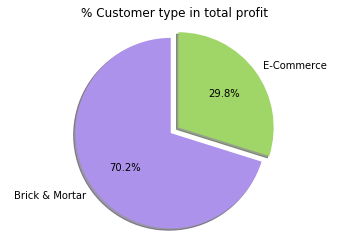

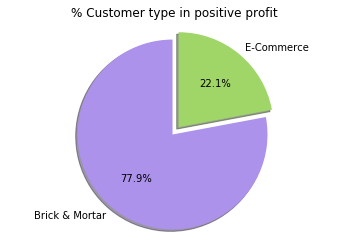

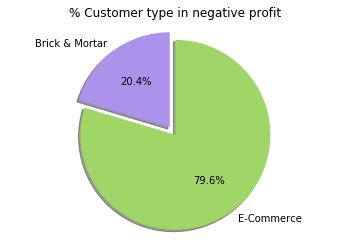

In [43]:
# Pie charts
labels = c_type_perc['Customer type']
sizes = c_type_perc['% Total profit']
sizesp= c_type_perc['% positive profit']
sizesn=c_type_perc["% negative profit"]
explode = (0, 0.1)

#add colors
colors = ["#ac92eb","#a0d568"]
fig,ax1 = plt.subplots()
fig,ax2= plt.subplots()
fig,ax3= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.pie(sizesp, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.pie(sizesn, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set_title('% Customer type in total profit')
ax2.axis("equal")
ax2.set_title('% Customer type in positive profit')
ax3.axis("equal")
ax3.set_title('% Customer type in negative profit')

plt.show()

Here we can see how most of the customers generate profits by using "Brick & Mortar", while those who generate losses do so when buying through e-commerce. This speaks of the need to **have a direct communication strategy with customers so we can recommend products that truly meet their needs**. Now let's see each type monthly evolution.

First let´s look at E-commerce.

In [44]:
#Define the table.
#Total.
prod_month2=sales2020[["new_profit (USD)","month_name","customer_type"]]
prod_month2=prod_month2[prod_month2["customer_type"]=="E-Commerce"]
prod_month2=prod_month2.groupby("month_name").sum()
prod_month2["Month number"]=[4,2,1,6,3,5]
prod_month2=prod_month2.sort_values(by=["Month number"], ascending=True)

#Positive.
prod_month3=sales2020[["new_profit (USD)","month_name","customer_type"]]
prod_month3=prod_month3[prod_month3["customer_type"]=="E-Commerce"]
prod_month3=prod_month3[prod_month3["new_profit (USD)"]>=0]
prod_month3=prod_month3.groupby("month_name").sum()
prod_month3["Month number"]=[4,2,1,6,3,5]
prod_month3=prod_month3.sort_values(by=["Month number"], ascending=True)

#Negative.
prod_month4=sales2020[["new_profit (USD)","month_name","customer_type"]]
prod_month4=prod_month4[prod_month4["customer_type"]=="E-Commerce"]
prod_month4=prod_month4[prod_month4["new_profit (USD)"]<0]
prod_month4=prod_month4.groupby("month_name").sum()
prod_month4["Month number"]=[4,2,1,6,3,5]
prod_month4=prod_month4.sort_values(by=["Month number"], ascending=True)

#Merging the tables.
monthe=prod_month2.merge(prod_month3, on="month_name", how="inner")
monthe["Total Profit (USD)"]=monthe["new_profit (USD)_x"]
monthe=monthe.drop(["new_profit (USD)_x"],axis=1)
monthe["Positive Profit (USD)"]=monthe["new_profit (USD)_y"]
monthe=monthe.drop(["new_profit (USD)_y"],axis=1)
monthe=monthe.merge(prod_month4, on="month_name", how="inner")
monthe["Negative Profit (USD)"]=monthe["new_profit (USD)"]
monthe=monthe.drop(["new_profit (USD)"],axis=1)
monthe=monthe.drop(["Month number_x"],axis=1)
monthe=monthe.drop(["Month number_y"],axis=1)
monthe = monthe[['Month number','Total Profit (USD)','Positive Profit (USD)','Negative Profit (USD)']]

#Printing the table.
monthe


,Month number,Total Profit (USD),Positive Profit (USD),Negative Profit (USD)
month_name,,,,
January,1,341.54,3836.80,-3495.27
February,2,1787.41,4535.53,-2748.12
March,3,881.27,4930.20,-4048.93
April,4,1189.92,3718.74,-2528.82
May,5,901.01,3433.14,-2532.13
June,6,505.41,2933.12,-2427.71


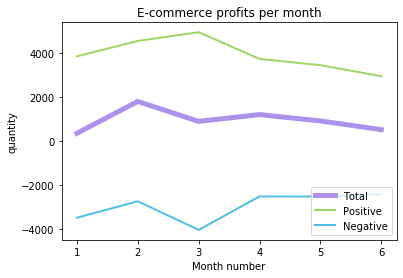

In [45]:
#Create the plot & its components.
fig = plt.figure()
plt.plot(monthe["Month number"], monthe["Total Profit (USD)"], c='#ac92eb', label="Total", linewidth=5)
plt.plot(monthe["Month number"], monthe["Positive Profit (USD)"], c='#a0d568', label="Positive", linewidth=2)
plt.plot(monthe["Month number"], monthe["Negative Profit (USD)"], c='#4fc1e8', label="Negative", linewidth=2)

# Create some format.
plt.legend(loc="lower right")
plt.xlabel("Month number")
plt.ylabel("quantity")
plt.title("E-commerce profits per month")
#Show the plot.
plt.show()

As we can see, there is a small positive trend in "E-commerce" earnings, which is reinforced by the lower amount of sales that generate losses. Now let´s look at "Brick & Mortar"

In [50]:
# Define the table.
# Total.
prod_month=sales2020[["new_profit (USD)","month_name","customer_type"]]
prod_month=prod_month[prod_month["customer_type"]=="Brick & Mortar"]
prod_month=prod_month.groupby("month_name").sum()
prod_month["Month number"]=[4,2,1,6,3,5]
prod_month=prod_month.sort_values(by=["Month number"], ascending=True)

# Positive.
prod_month2=sales2020[["new_profit (USD)","month_name","customer_type"]]
prod_month2=prod_month2[prod_month2["customer_type"]=="Brick & Mortar"]
prod_month2=prod_month2[prod_month2["new_profit (USD)"]>=0]
prod_month2=prod_month2.groupby("month_name").sum()
prod_month2["Month number"]=[4,2,1,6,3,5]
prod_month2=prod_month2.sort_values(by=["Month number"], ascending=True)

# Negative.
prod_month3=sales2020[["new_profit (USD)","month_name","customer_type"]]
prod_month3=prod_month3[prod_month3["customer_type"]=="Brick & Mortar"]
prod_month3=prod_month3[prod_month3["new_profit (USD)"]<0]
prod_month3=prod_month3.groupby("month_name").sum()
prod_month3["Month number"]=[4,2,1,6,3,5]
prod_month3=prod_month3.sort_values(by=["Month number"], ascending=True)

# Merging of table.
monthb=prod_month.merge(prod_month2, on="month_name", how="inner")
monthb["Total Profit (USD)"]=monthb["new_profit (USD)_x"]
monthb=monthb.drop(["new_profit (USD)_x"],axis=1)
monthb["Positive Profit (USD)"]=monthb["new_profit (USD)_y"]
monthb=monthb.drop(["new_profit (USD)_y"],axis=1)
monthb=monthb.merge(prod_month3, on="month_name", how="inner")
monthb["Negative Profit (USD)"]=monthb["new_profit (USD)"]
monthb=monthb.drop(["new_profit (USD)"],axis=1)
monthb=monthb.drop(["Month number_x"],axis=1)
monthb=monthb.drop(["Month number_y"],axis=1)
monthb = monthb[['Month number','Total Profit (USD)','Positive Profit (USD)','Negative Profit (USD)']]
monthb

,Month number,Total Profit (USD),Positive Profit (USD),Negative Profit (USD)
month_name,,,,
January,1,1482.44,11256.55,-9774.11
February,2,2918.86,17111.34,-14192.49
March,3,6866.89,18839.20,-11972.32
April,4,-1756.68,13739.39,-15496.06
May,5,2442.71,13753.22,-11310.51
June,6,1224.86,7967.54,-6742.68


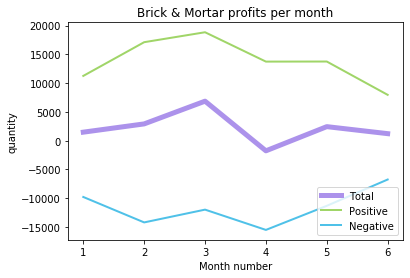

In [47]:
#Create the plot & its components.
fig = plt.figure()
plt.plot(monthb["Month number"], monthb["Total Profit (USD)"], c='#ac92eb', label="Total", linewidth=5)
plt.plot(monthb["Month number"], monthb["Positive Profit (USD)"], c='#a0d568', label="Positive", linewidth=2)
plt.plot(monthb["Month number"], monthb["Negative Profit (USD)"], c='#4fc1e8', label="Negative", linewidth=2)

# Create some format.
plt.legend(loc="lower right")
plt.xlabel("Month number")
plt.ylabel("quantity")
plt.title("Brick & Mortar profits per month")
#Show the plot.
plt.show()

In the case of "Brick and Mortar" there is a greater dispersion in the data and a downward trend in the 3 scenarios.

Even thougth we have to remenber that most of the profits came from clients who bougth through "Brick & Mortar".

<a href="#Methodology.">Back to top.</a>

## Last conclusions.

After reviewing the information we can reach certain conclusions a general level:
+ 2020 negatively affected sales to the North and Central regions however, the South zone had a slight increase in profits.
+ Our products had a significant drop in profit during 2020.
+ The "Brick & Mortar" sales had a very negative impact on profits in 2020 however, the drop was less important in the e-commerce channel.
+ Clients seem to be differentiated by the level of profit, so it is recommended to investigate a little more to discover how we can increase our profits without negatively impacting our relationship with them.
+ The more expensive the product, generate the greater profit.
+ April was the month that most negatively impacted the 2020 profits.

While if we want to generate strategies, we can focus on the great data dispersion knowing that in 2020:
+ The products that generate the most profits were Prod083, Prod047, Prod206, Prod070 & Prod061 making 58.34% of the profits between the 5 of them.
+ The products that generate the most losses were Prod073, Prod044, Prod084, Prod169 & Prod016 representing a lost of 50% in profits.
+ The clients that generate the most profits were Electricalsara Stores, Surge Stores, Excel Stores, Modular & Premium Stores, producing 63.29% of the profits between the 5 of them.
+ There were only 8 clients that generate losses, they represent a lost of the 17% in profits.

So a good strategy should focus on customers who generate most of the profits, maintaining continuous contact with them so they buy products that are according to their needs and at the same time generate profits (this good communication must be maintained in "Brick & Mortar "as in" E-commerce ") and in the same way maintain good communication with suppliers to reduce losses due to distributing their products.

<a href="#Methodology.">Back to top.</a>